In [2]:
import requests
import numpy as np

# localhost의 8888포트로 request를 보냅니다. 
# 이때 전달할 파일을 딕셔너리 형태로 위치를 전달합니다.
response = requests.post("http://35.222.99.236:9000/api", files={'file': open('aespa.png', 'rb')})

print(response.json())

# 다음과 같이 curl로 리눅스 cli에서 요청할 수도 있습니다.
# curl -X POST -F file=@aespa.png 'http://localhost:8080/api'

{'cvout': [[[[0.0, 0.0, 0.9996151924133301, 0.6162804365158081, 0.10166096687316895, 0.9742269515991211, 0.9700121879577637], [0.0, 0.0, 0.9991544485092163, 0.20724457502365112, 0.0968429446220398, 0.5028064250946045, 1.0], [0.0, 0.0, 0.999096155166626, 0.022075682878494263, 0.1608010232448578, 0.2810867726802826, 0.989790678024292], [0.0, 0.0, 0.9985042810440063, 0.41165053844451904, 0.11578497290611267, 0.6709364652633667, 0.977880597114563], [0.0, 0.0, 0.6600064039230347, 0.48471033573150635, 0.1288284957408905, 0.8573524951934814, 0.9542738199234009], [0.0, 0.0, 0.5047682523727417, 0.5105237364768982, 0.29743924736976624, 0.9475595355033875, 0.9974026679992676], [0.0, 0.0, 0.5040323734283447, 0.3079172372817993, 0.135564923286438, 0.6050385236740112, 1.0], [0.0, 0.0, 0.4372153580188751, 0.09356272220611572, 0.18849635124206543, 0.5648255944252014, 0.9954530000686646], [0.0, 0.0, 0.2833484411239624, 0.3514786958694458, 0.2820863425731659, 0.7532995939254761, 0.9984104633331299], [0.

In [3]:
cv_out = np.array(response.json()["cvout"])

In [4]:
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

person: 0.9996
person: 0.9992
person: 0.9991
person: 0.9985


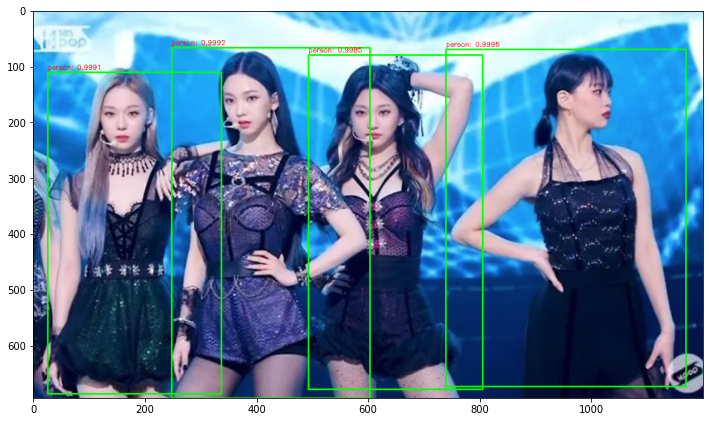

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/aespa.png')

# 원본 이미지가 Faster RCNN기반 네트웍으로 입력 시 resize됨. 
# resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows = img.shape[0]
cols = img.shape[1]
draw_img = img.copy()

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# detected 된 object들을 iteration 하면서 정보 추출
for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    # detected된 object들의 score가 0.5 이상만 추출
    if score > 0.9:
        # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        # labels_to_names_seq 딕셔너리로 class_id값을 클래스명으로 변경.
        caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
        print(caption)
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)